# Курсовая работа по Численным методам 
## Выполнил: Сабитов Алексей


In [142]:
import numpy as np
from matplotlib import pyplot as plt

In [143]:
A = 180
B = 55
C = 70
T1 = 35.
T2 = 65.
T3 = 65.
T4 = 35.
T5 = 25.
T6 = 25.
h = 10;
row, col = int((C+B)/h)+1, int(A/h) +1 
print(row, col)
def GetBeginTemperature(A, B, C, T1, T2, T3, T4, T5, T6):
    T_begin = [[0]*col for i in range(row)]
    for i in range(col):
        T_begin[row-1][i] = T6
        if (i*h)>=int(A/2):
            T_begin[0][i] = T4
        else:
            T_begin[int(B/h)][i] = T2
        
    for i in range(row):
        if (i*h)<= B:
            T_begin[i][int(col/2)] = T3 
        else:
            T_begin[i][0] = T1
        T_begin[i][col-1] = T5
    return T_begin

T_begin = GetBeginTemperature(A, B, C, T1, T2, T3, T4, T5, T6)

    
        
    


13 19


In [144]:
T_prev = np.copy(T_begin)
T_new = np.copy(T_begin)

def Norm(T_new, T_prev):
    Max = np.abs(T_new[0][0] - T_prev[0][0])
    for i in range(row):
        for j in range(col):
            M = np.abs(T_new[i][j] - T_prev[i][j]) 
            if (M > Max):
                Max = M
    return Max

def Zeidel_method(T_prev, T_new, row, col, B, h, e):
    iterations = 0
    while True:
        for i in range(1, row-1):
            if (i<int(B/h)):
                for j in range(int(col/2) + 1 , col - 1):
                    T_new[i][j] = (T_new[i][j-1] + T_prev[i][j+1] + T_new[i-1][j] + T_prev[i+1][j])/4 
            if (i == int(B/h)): 
                for j in range(int(col/2), col - 1):
                    T_new[i][j] = (T_new[i][j-1] + T_prev[i][j+1] + T_new[i-1][j] + T_prev[i+1][j])/4 
            if (i > int(B/h)):
                for j in range(1 , col - 1):
                    T_new[i][j] = (T_new[i][j-1] + T_prev[i][j+1] + T_new[i-1][j] + T_prev[i+1][j])/4
        iterations += 1
        if Norm(T_new, T_prev) < e:
            break    
        T_prev = np.copy(T_new)
        
    return np.array(T_new), iterations
                                


In [145]:
e = 0.1
T_final, iterations = Zeidel_method(T_prev, T_new, row, col, B, h, e)
print("Количество итерации метода Зейделя для точности е = ", e, " : ", iterations)



Количество итерации метода Зейделя для точности е =  0.1  :  50


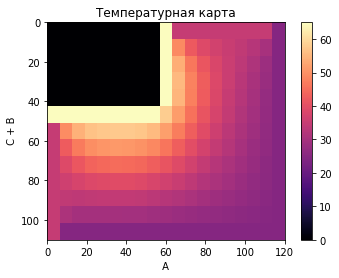

In [146]:
import seaborn as sns

fig, axes = plt.subplots(1, 1)
results = axes.imshow(T_final, cmap='magma', interpolation='nearest', extent=[0.,120,110,0],)
fig.colorbar(results)

axes.set_title("Температурная карта")
axes.set_xlabel(' A ')
axes.set_ylabel(' C + B')

plt.show()

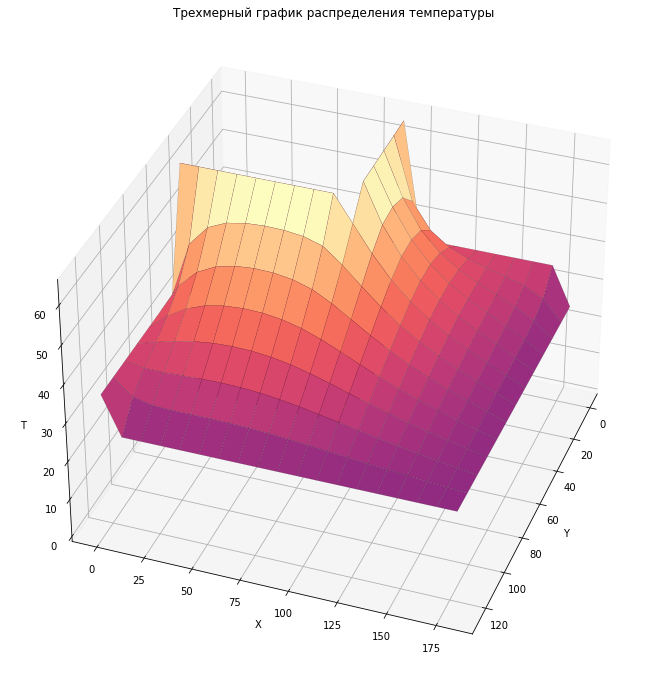

In [147]:
def axis(A,B,C,col,row): 
    x = np.linspace (0., A, col)
    y = np.linspace (0., B+C , row)
    # сетка
    xgrid, ygrid = np.meshgrid(x, y)
    return xgrid, ygrid

x,y = axis(A,B,C,col,row)

fig = plt.figure(figsize=(12,12))
axes = fig.add_subplot(projection='3d')
axes.set_title('Трехмерный график распределения температуры')
axes.set_xlabel('Y')
axes.set_ylabel('X')
axes.set_zlabel('T')

axes.plot_surface(y,x, T_final, cmap = 'magma',linewidth=0.1, edgecolors='k')
axes.view_init(elev=35, azim=20)
plt.show()

## Построение тестового примера

In [148]:
A = 360
B = 180
C = 180
h = 0.02
row, col = int((C+B)/h)+1, int(A/h) +1 
#нормализация
def Normalisation(A, B, C):
    M = 180
    A /= M
    B /= M
    C /= M
    return A, B, C
A, B, C = Normalisation(A, B, C)
print(A,B,C)
row, col = int((C+B)/h)+1, int(A/h) +1 




2.0 1.0 1.0


In [149]:
def Zeidel_method_test(T_prev, T_new, row, col, B, h, e, F, T_):
    iterations = 0
    while True:
        for i in range(1, row-1):
            if (i<=int(B/h)):
                for j in range(int(col/2) + 1 , col - 1):
                    T_new[i][j] = (T_new[i][j-1] + T_prev[i][j+1] + T_new[i-1][j] + T_prev[i+1][j])/4 - F(i, j, h)/4
            else:
                for j in range(1 , col - 1):
                    T_new[i][j] = (T_new[i][j-1] + T_prev[i][j+1] + T_new[i-1][j] + T_prev[i+1][j])/4 - F(i, j, h)/4
        iterations += 1
        if Norm(T_new, T_prev) < e:
            break    
        T_prev = np.copy(T_new)
        
    return np.array(T_new), iterations

#Точное решение
def U_(T_, row, col, B, h, U):
    for i in range(1, row-1):
        if (i<= int(B/h)):
            for j in range(int(col/2) + 1 , col - 1):
                T_[i][j] = U(i, j, h)
        else:
            for j in range(1 , col - 1):
                T_[i][j] = U(i, j, h)
    return T_
#Правая часть тестового примера                               
def F(i, j, h):
    return   -17* np.pi**2 * h**2 * np.sin(4* np.pi * j*h) * np.sin( np.pi * i*h)
#Точное решение(функция)
def U(i, j, h):
    return  np.sin(4*np.pi * j*h) * np.sin( np.pi * i*h)

In [150]:
e = 0.0001
T_prev = [[0]*col for i in range(row)]
T_new = [[0]*col for i in range(row)]

T_ = [[0]*col for i in range(row)]
T_ = U_(T_, row, col, B, h, U)

T_final, iterations = Zeidel_method_test(T_prev, T_new, row, col, B, h, e, F, T_)

print("Количество итерации метода Зейделя для точности е = ", e, " : ", iterations)

#print("фактическая погрешность: ", max(np.abs(T_final - T_)))#for i in range(row)) for j in range(col)))


Количество итерации метода Зейделя для точности е =  0.0001  :  201


In [151]:
print("фактическая погрешность: ", max(np.abs(T_final[i][j] - T_[i][j]) for i in range(row) for j in range(col)))

фактическая погрешность:  0.00899301434852573


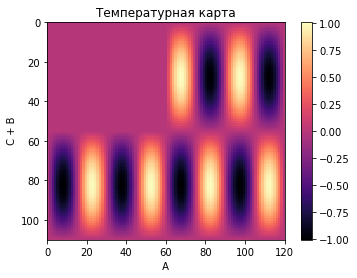

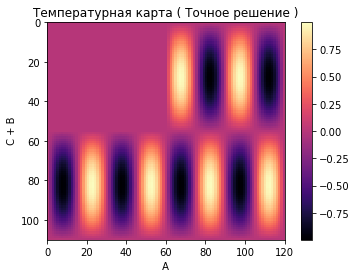

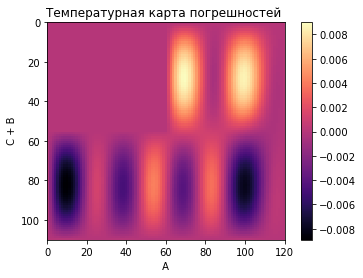

In [152]:
fig, axes = plt.subplots(1, 1)
results = axes.imshow(T_final, cmap='magma', interpolation='nearest', extent=[0.,120,110,0],)
fig.colorbar(results)

axes.set_title("Температурная карта")
axes.set_xlabel(' A ')
axes.set_ylabel(' C + B')
plt.show()

fig, axes = plt.subplots(1, 1)
results = axes.imshow(T_, cmap='magma', interpolation='nearest', extent=[0.,120,110,0],)
fig.colorbar(results)

axes.set_title("Температурная карта ( Точное решение )")
axes.set_xlabel(' A ')
axes.set_ylabel(' C + B')
plt.show()


fig, axes = plt.subplots(1, 1)
results = axes.imshow(T_final - T_, cmap='magma', interpolation='nearest', extent=[0.,120,110,0],)
fig.colorbar(results)

axes.set_title("Температурная карта погрешностей ")
axes.set_xlabel(' A ')
axes.set_ylabel(' C + B')
plt.show()

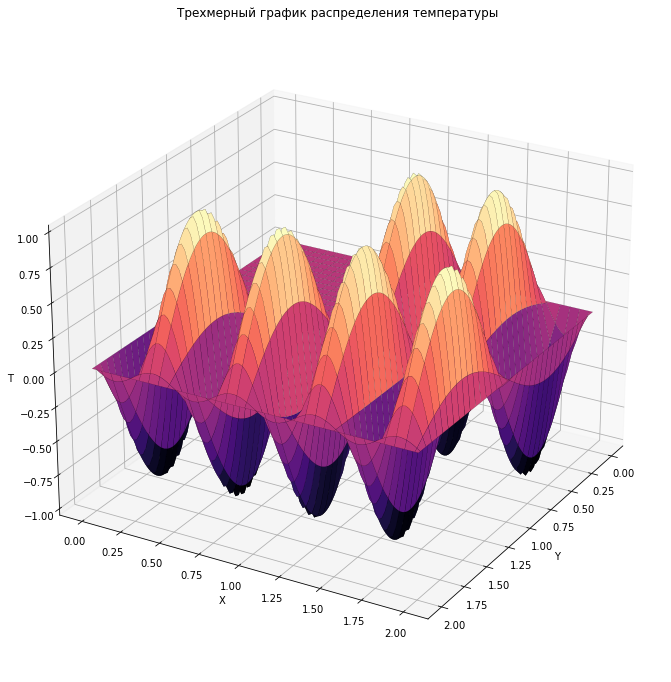

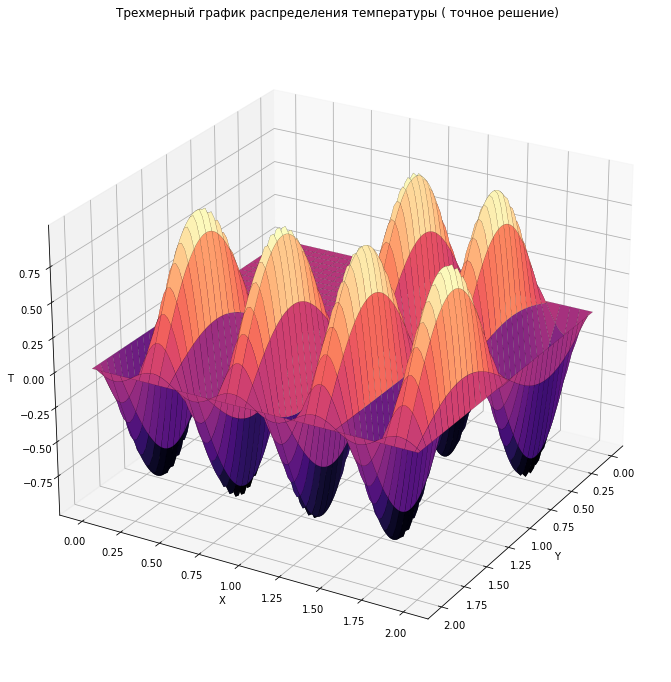

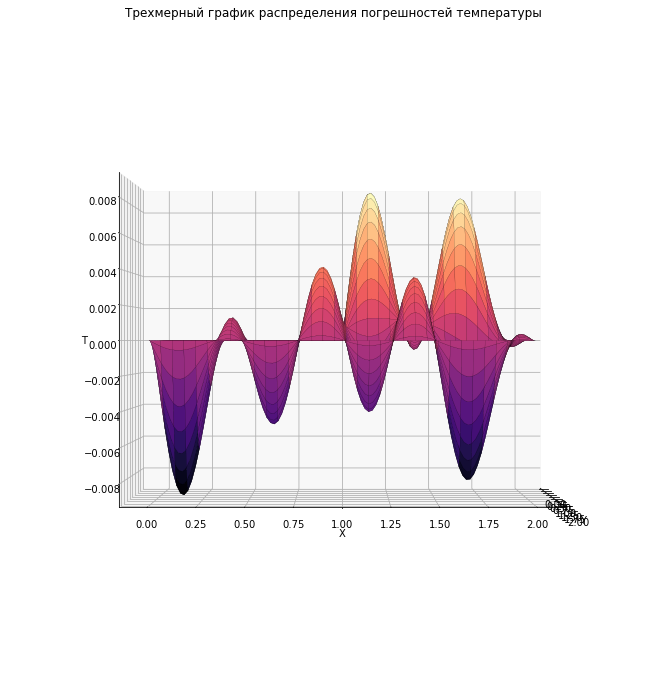

In [153]:
x,y = axis(A,B,C,col,row)

fig = plt.figure(figsize=(12,12))
axes = fig.add_subplot(projection='3d')
axes.set_title('Трехмерный график распределения температуры')
axes.set_xlabel('Y')
axes.set_ylabel('X')
axes.set_zlabel('T')

axes.plot_surface(y,x, T_final, cmap = 'magma',linewidth=0.1, edgecolors='k')
axes.view_init(elev=25, azim=30)
plt.show()

fig = plt.figure(figsize=(12,12))
axes = fig.add_subplot(projection='3d')
axes.set_title('Трехмерный график распределения температуры ( точное решение)')
axes.set_xlabel('Y')
axes.set_ylabel('X')
axes.set_zlabel('T')

axes.plot_surface(y,x, np.array(T_), cmap = 'magma',linewidth=0.1, edgecolors='k')
axes.view_init(elev=25, azim=30)
plt.show()

fig = plt.figure(figsize=(12,12))
axes = fig.add_subplot(projection='3d')
axes.set_title('Трехмерный график распределения погрешностей температуры')
axes.set_xlabel('Y')
axes.set_ylabel('X')
axes.set_zlabel('T')

axes.plot_surface(y,x, np.array(T_final - T_), cmap = 'magma',linewidth=0.1, edgecolors='k')
axes.view_init(elev=0, azim=0)
plt.show()